## CZ4032 Data Analytics and Mining 


#### Importing important modules and libraries 

In this project, we mainly used Sci-Kit Learn. The following libraries and modules were imported

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler()

#### Importing the CSV downloaded from kaggle
The data was taken from: https://www.kaggle.com/code/juniorbueno/miami-florida-prediction-prices/data

In [2]:
miamiData = pd.read_csv("./miami_housing.csv") #import fresh data  
miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]] = scaler.fit_transform(miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]])
miamiData.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,0.845660,0.903382,622280070620,0.142746,9375,1753,0,2815.9,0.166541,0.006897,42815.3,37742.2,0.329985,67,0,8,4
1,0.846203,0.918989,622280100460,0.107448,9375,1715,0,4359.1,0.137895,0.006702,43504.9,37340.5,0.375122,63,0,9,4
2,0.846222,0.919529,622280100470,0.282389,9375,2276,49206,4412.9,0.136911,0.005895,43530.4,37328.7,0.376693,61,0,2,4
3,0.847019,0.922091,622280100530,0.355314,12450,2058,10033,4585.0,0.131381,0.000000,43797.5,37423.2,0.383222,63,0,9,4
4,0.847130,0.917398,622280100200,0.264934,12800,1684,16681,4063.4,0.140390,0.006480,43599.7,37550.8,0.370513,42,0,7,4


In [3]:
def kmeans(varname1, varname2, k):
   
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents = np.random.rand(k,2)
    k_means = KMeans(n_clusters=k, init=init_cents, random_state=42, n_init=1) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[[str(varname1), str(varname2)]])
    end = time.time()
    print("Total Time taken for K-means: ", end-start)
    centroid = k_means.cluster_centers_
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
    sb.scatterplot(data=dataset, x=varname1, y=varname2, hue="clusters", palette="deep", alpha=0.5)
    sb.scatterplot(data = init_cents, x=init_cents[:, 0], y=init_cents[:,1], color = "red", marker='x', s=100)
    sb.scatterplot(data = centroid, x=centroid[:, 0], y=centroid[:,1], color = "black", marker='x', s=100)
    

def kmeanspp(varname1, varname2,k):
   
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents, indices = kmeans_plusplus(X[[varname1, varname2]].to_numpy(), n_clusters=k, random_state=42)
    k_means = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=1) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[[varname1, varname2]])
    end = time.time()
    print("Total Time taken for K-means: ", end-start)
    centroid = k_means.cluster_centers_
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
    sb.scatterplot(data=dataset, x=varname1, y=varname2, hue="clusters", palette="deep", alpha=0.5)
    sb.scatterplot(data = init_cents, x=init_cents[:, 0], y=init_cents[:,1], color = "red", marker='x', s=50)
    sb.scatterplot(data = centroid, x=centroid[:, 0], y=centroid[:,1], color = "black", marker ='x', s=50)

## Kmeans vs Kmeans++ vs DBscan

## Longitude and Latitude 

#### Finding the elbow curve for Kmeans and Kmeans++

Reference: 
https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera 


In the above article, the following image is shown:

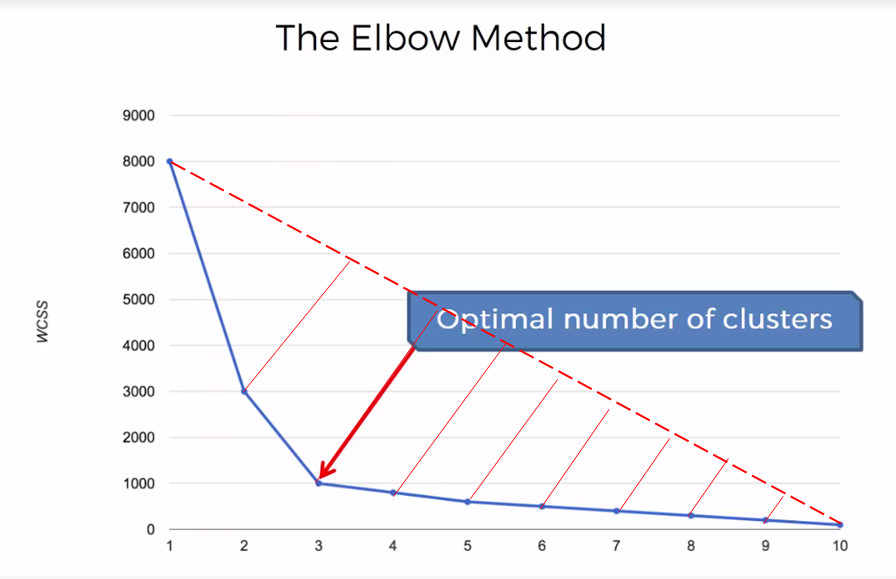




It shows how to get the Elbow Curve by drawing a straight line from the first point to the last point. The largest distance to this imaginary point shall be the optimal K.

K:  1 Inertia:  1565.8563135763868 Difference:  -1565.8563135763868
K:  2 Inertia:  542.1243808371818 Difference:  1023.731932739205
K:  3 Inertia:  374.6408044558295 Difference:  167.4835763813523
K:  4 Inertia:  279.5148205745221 Difference:  95.12598388130738
K:  5 Inertia:  211.16935809032947 Difference:  68.34546248419264
K:  6 Inertia:  162.14098398969207 Difference:  49.02837410063739
K:  7 Inertia:  139.07859307564837 Difference:  23.062390914043704
K:  8 Inertia:  123.58772095575458 Difference:  15.490872119893794
K:  9 Inertia:  108.62486562457875 Difference:  14.962855331175831
K:  10 Inertia:  96.39405178545682 Difference:  12.230813839121922
[0.0, 5.269941318120768, 5.2957257264627735, 4.878350663762851, 4.296956300717009, 3.5972529893721887, 2.738519077692685, 1.8334128345429561, 0.9250727131960043, 0.0]


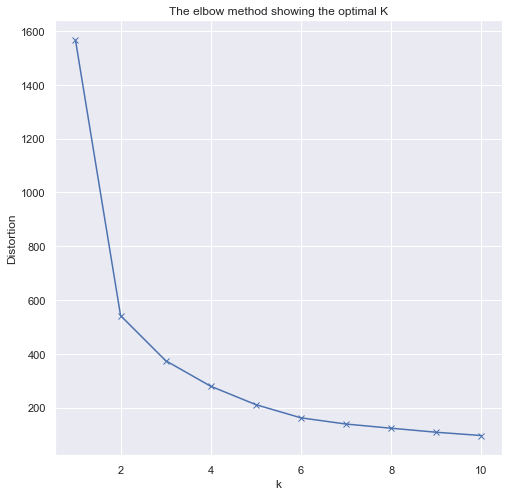

In [4]:
#Between the variables Latitude and Longitude 

data = pd.DataFrame(miamiData[['LATITUDE', 'LONGITUDE']])
norm = np.linalg.norm
distortions = []
distances = []
K = range(1,11)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    print("K: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([1,distortions[0]])
    p2 = np.array([10,distortions[9]])
    p3 = np.array([i,distortions[i-1]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))

print(distances)
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

#### Kmeans 

Total Time taken for K-means:  0.02498912811279297


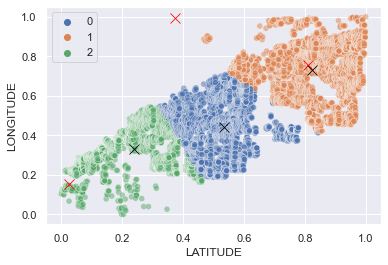

In [5]:
kmeans("LATITUDE", "LONGITUDE", 3)

#### Kmeans++

Total Time taken for K-means:  0.025005578994750977


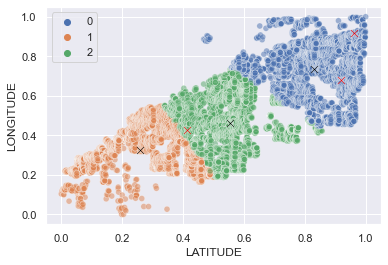

In [6]:
kmeanspp("LATITUDE", "LONGITUDE", 3)

#### DBScan

## Ocean_Dist and Water_Dist

#### Finding the elbow curve for Kmeans and Kmeans++

K:  1 Inertia:  1537.3818184201075 Difference:  -1537.3818184201075
K:  2 Inertia:  715.1314438084459 Difference:  822.2503746116616
K:  3 Inertia:  424.9751893032792 Difference:  290.15625450516666
K:  4 Inertia:  298.2584024856414 Difference:  126.7167868176378
K:  5 Inertia:  218.97876599359904 Difference:  79.27963649204236
K:  6 Inertia:  175.4662764784507 Difference:  43.51248951514833
K:  7 Inertia:  145.3096669266248 Difference:  30.15660955182591
K:  8 Inertia:  128.00059418196605 Difference:  17.30907274465875
K:  9 Inertia:  114.36853618903754 Difference:  13.632057992928509
K:  10 Inertia:  102.44237951375298 Difference:  11.92615667528456
[0.0, 4.157106872283343, 4.976962874704379, 4.771739882452682, 4.268994957133585, 3.541921406763634, 2.7310808679209426, 1.839661627369002, 0.9251804505636564, 0.0]


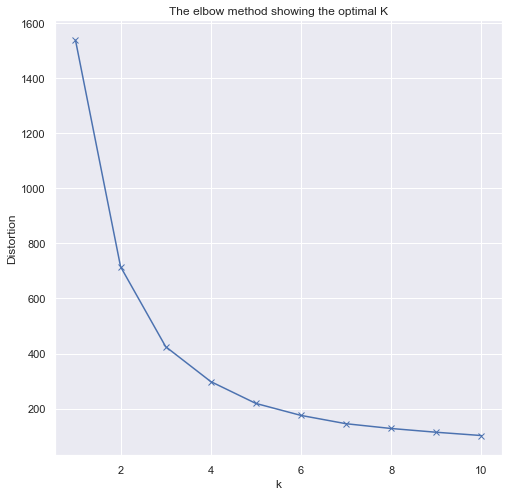

In [7]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'WATER_DIST']])
norm = np.linalg.norm
distortions = []
distances = []
K = range(1,11)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    print("K: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([1,distortions[0]])
    p2 = np.array([10,distortions[9]])
    p3 = np.array([i,distortions[i-1]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))

print(distances)
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

#### Kmeans

Total Time taken for K-means:  0.019988536834716797


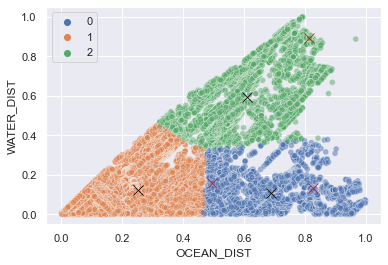

In [8]:
kmeans("OCEAN_DIST", "WATER_DIST", 3)

Total Time taken for K-means:  0.02199697494506836


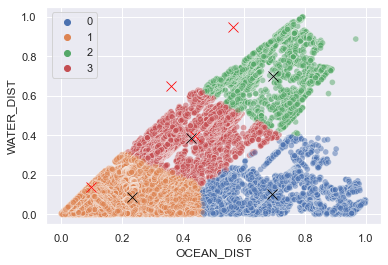

In [9]:
kmeans("OCEAN_DIST", "WATER_DIST", 4)

#### Kmeans++

Total Time taken for K-means:  0.020003318786621094


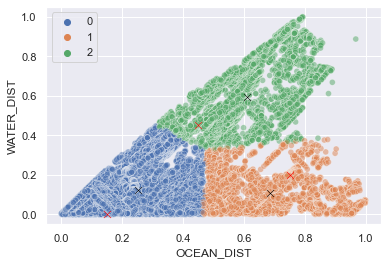

In [10]:
kmeanspp("OCEAN_DIST", "WATER_DIST", 3)

Total Time taken for K-means:  0.02800607681274414


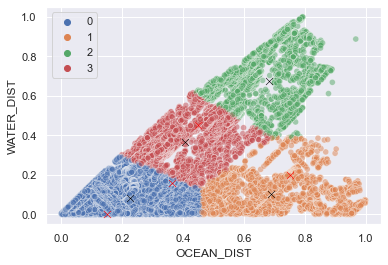

In [11]:
kmeanspp("OCEAN_DIST", "WATER_DIST", 4)

#### DBSCan

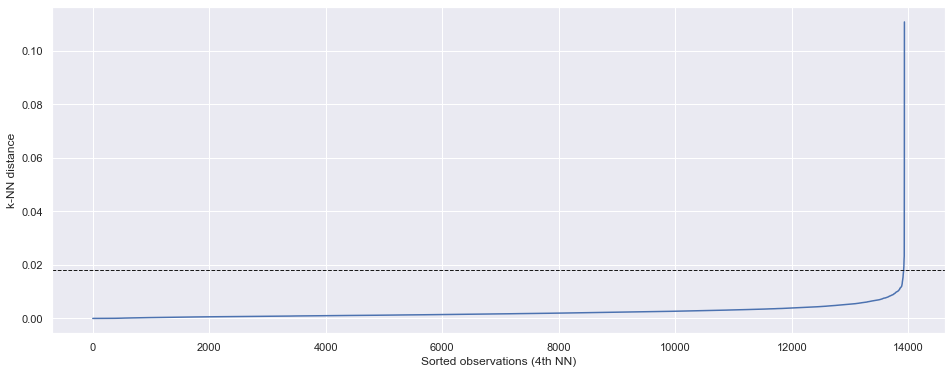

In [12]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'WATER_DIST']]
X[['OCEAN_DIST', 'WATER_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'WATER_DIST']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.018, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

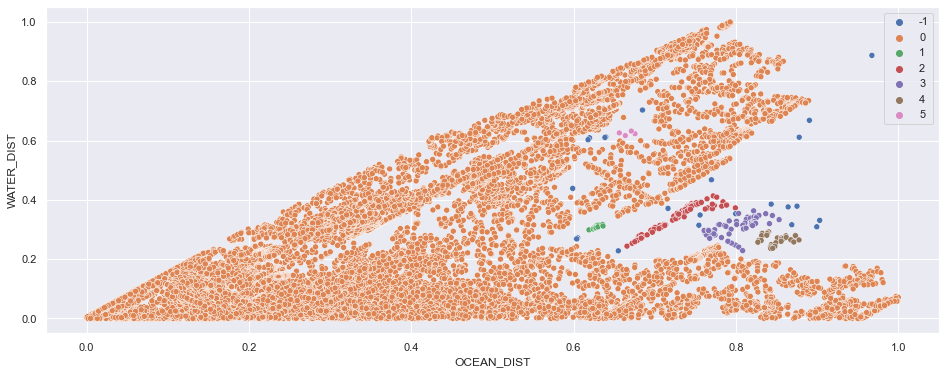

In [13]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'WATER_DIST']]
X[['OCEAN_DIST', 'WATER_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'WATER_DIST']])

clusters = DBSCAN(eps=0.018, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="WATER_DIST", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


## Ocean_Dist and SALE_PRC

#### Finding the elbow curve for Kmeans and Kmeans++

K:  1 Inertia:  967.354084618602 Difference:  -967.354084618602
K:  2 Inertia:  424.39284768290185 Difference:  542.9612369357001
K:  3 Inertia:  271.203711514225 Difference:  153.18913616867684
K:  4 Inertia:  180.48921310473492 Difference:  90.71449840949009
K:  5 Inertia:  136.4044727962081 Difference:  44.08474030852682
K:  6 Inertia:  111.47682451448026 Difference:  24.92764828172784
K:  7 Inertia:  95.81765827701413 Difference:  15.659166237466124
K:  8 Inertia:  84.4297494800587 Difference:  11.38790879695543
K:  9 Inertia:  73.64901002061464 Difference:  10.780739459444064
K:  10 Inertia:  65.27463291182065 Difference:  8.374377108793993
[0.0, 4.416876337057232, 4.94521012548898, 4.85026870602746, 4.290127755735257, 3.5388670015690726, 2.6951396836869166, 1.8088003721272377, 0.9164036649805276, 0.0]


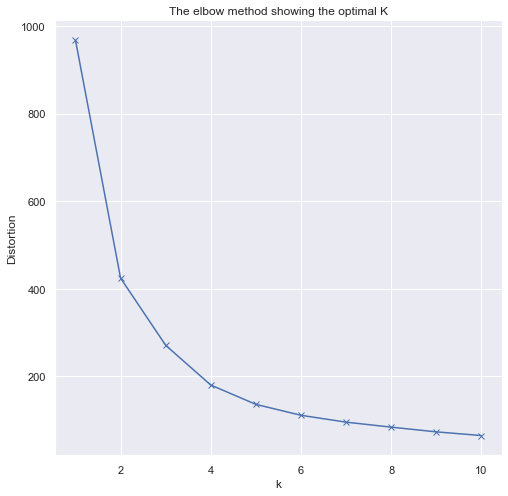

In [14]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'SALE_PRC']])
norm = np.linalg.norm
distortions = []
distances = []
K = range(1,11)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    print("K: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([1,distortions[0]])
    p2 = np.array([10,distortions[9]])
    p3 = np.array([i,distortions[i-1]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))

print(distances)
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

Total Time taken for K-means:  0.024988412857055664


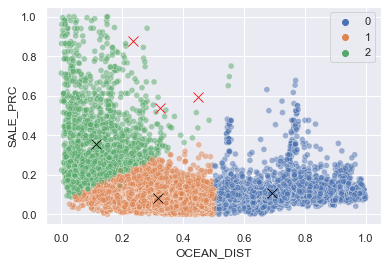

In [15]:
kmeans("OCEAN_DIST", "SALE_PRC",3)

Total Time taken for K-means:  0.02698993682861328


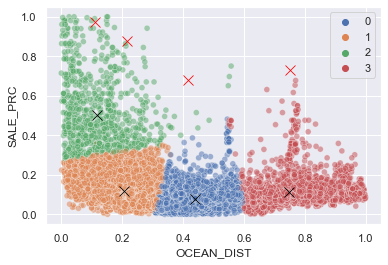

In [16]:
kmeans("OCEAN_DIST", "SALE_PRC",4)

Total Time taken for K-means:  0.02698993682861328


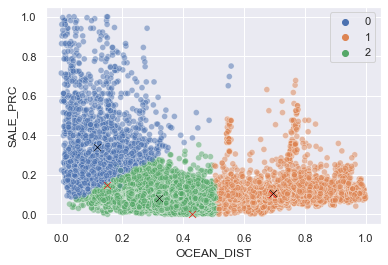

In [17]:
kmeanspp("OCEAN_DIST", "SALE_PRC",3)

Total Time taken for K-means:  0.022002458572387695


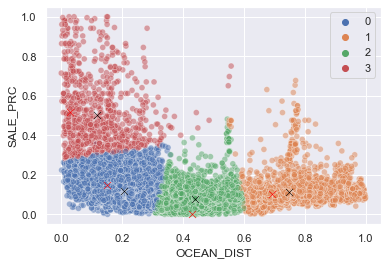

In [18]:
kmeanspp("OCEAN_DIST", "SALE_PRC",4)

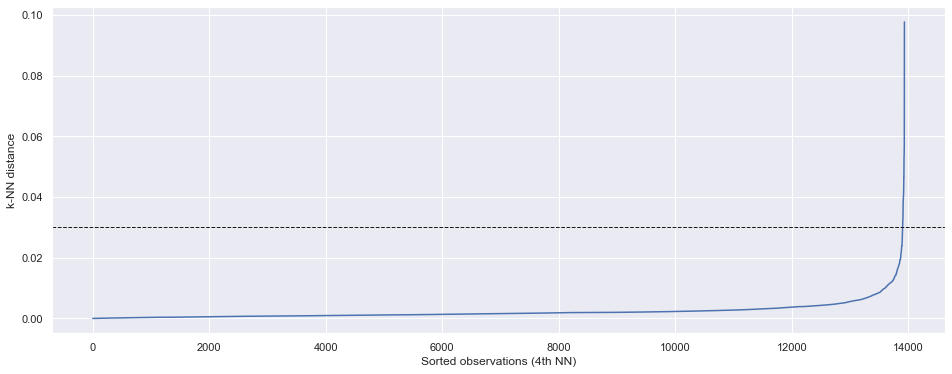

In [19]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'SALE_PRC']]
X[['OCEAN_DIST', 'SALE_PRC']] = scaler.fit_transform(X[['OCEAN_DIST', 'SALE_PRC']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.03, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

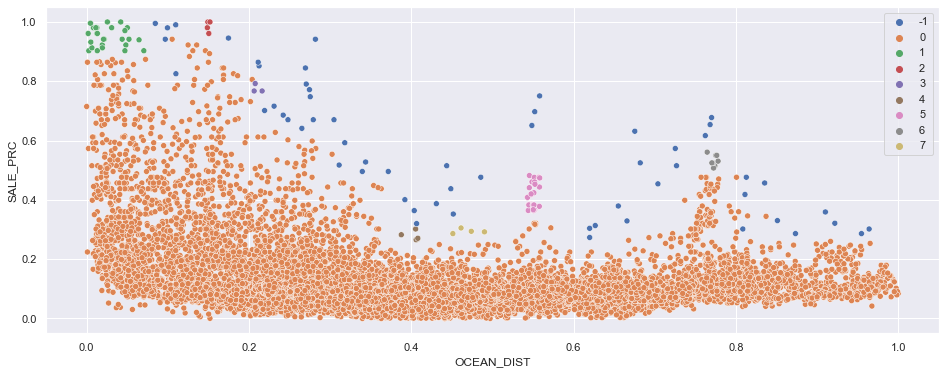

In [20]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'SALE_PRC']]
X[['OCEAN_DIST', 'SALE_PRC']] = scaler.fit_transform(X[['OCEAN_DIST', 'SALE_PRC']])

clusters = DBSCAN(eps=0.03, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="SALE_PRC", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


Note: Although better at clustering than Kmeans at the visual level, it is not ideal.<br>
Almost entire range of sale price is now clustered together because points are reachable.

## Ocean_Dist and HWY_DIST

#### Finding the elbow curve for Kmeans and Kmeans++

K:  1 Inertia:  978.4202404953587 Difference:  -978.4202404953587
K:  2 Inertia:  421.4779243051271 Difference:  556.9423161902316
K:  3 Inertia:  284.06207675428925 Difference:  137.41584755083784
K:  4 Inertia:  205.1114013171477 Difference:  78.95067543714154
K:  5 Inertia:  151.5928240944075 Difference:  53.51857722274022
K:  6 Inertia:  125.0544857207834 Difference:  26.538338373624086
K:  7 Inertia:  109.55601500085395 Difference:  15.498470719929458
K:  8 Inertia:  95.32664637522396 Difference:  14.229368625629988
K:  9 Inertia:  84.19382660905052 Difference:  11.13281976617344
K:  10 Inertia:  75.1839191880431 Difference:  9.009907421007412
[0.0, 4.549241931653276, 4.918458430129671, 4.705146948469539, 4.238438302859245, 3.5029073229913434, 2.657378688574938, 1.7992051332106962, 0.9101785710514777, 0.0]


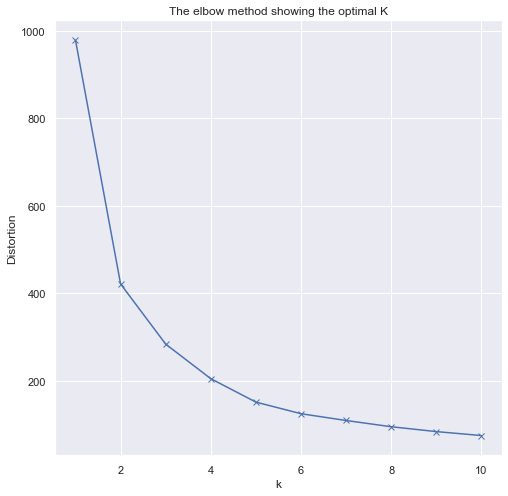

In [21]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'HWY_DIST']])
norm = np.linalg.norm
distortions = []
distances = []
K = range(1,11)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    print("K: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([1,distortions[0]])
    p2 = np.array([10,distortions[9]])
    p3 = np.array([i,distortions[i-1]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))

print(distances)
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

Total Time taken for K-means:  0.026004552841186523


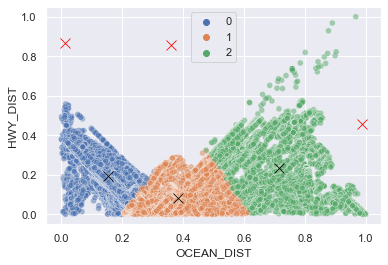

In [22]:
kmeans("OCEAN_DIST", "HWY_DIST",3)

Total Time taken for K-means:  0.024989843368530273


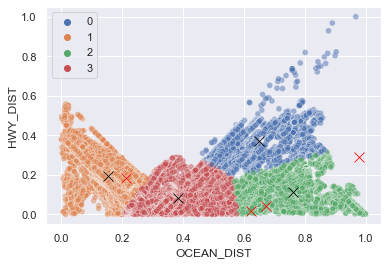

In [23]:
kmeans("OCEAN_DIST", "HWY_DIST",4)

Total Time taken for K-means:  0.02100348472595215


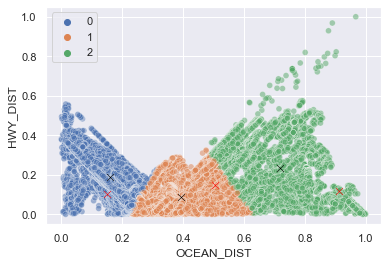

In [24]:
kmeanspp("OCEAN_DIST", "HWY_DIST",3)

Total Time taken for K-means:  0.022003650665283203


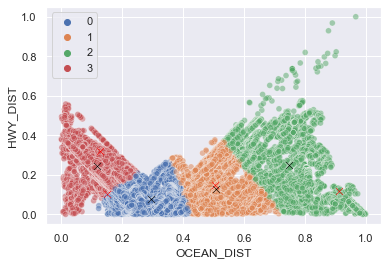

In [25]:
kmeanspp("OCEAN_DIST", "HWY_DIST",4)

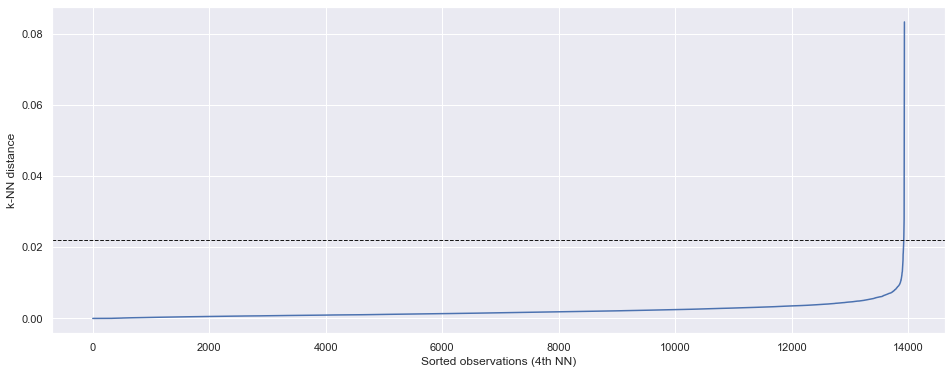

In [26]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'HWY_DIST']]
X[['OCEAN_DIST', 'HWY_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'HWY_DIST']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.022, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

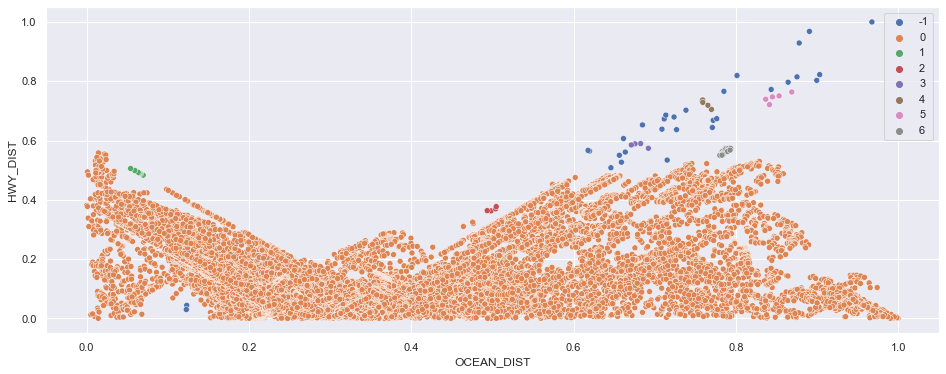

In [27]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'HWY_DIST']]
X[['OCEAN_DIST', 'HWY_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'HWY_DIST']])

clusters = DBSCAN(eps=0.022, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="HWY_DIST", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

### Further Exploration 

Here we explore 3-dimensions for Kmeans and Kmeans++

In [28]:
def three_Feature_clustering(varname):
   
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    print(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    init_cents = np.random.rand(5,3)
    k_means = KMeans(n_clusters=5, init=init_cents, random_state=42, n_init=1) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
#     sb.scatterplot(data = centroid, x=centroid[:, 1], y=centroid[:,0], color = "black")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent', alpha=0.01)
    ax.scatter(init_cents[:,0], init_cents[:,1], init_cents[:,2], color="black", marker="x", s=200)
    print("Data for kmeans: ", varname)
    print("Time Taken for kmeans: ", end-start)
    plt.show()
    
def three_Feature_clustering_kmeanspp(varname):
    
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    centers_init, indices = kmeans_plusplus(X[["LATITUDE", "LONGITUDE", varname]].to_numpy(), n_clusters=5, random_state=42)
    
    k_means = KMeans(n_clusters=5, init='k-means++', random_state=42) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    print("Data for kmeans++: ", varname)
    print("Time Taken for kmeans++: ", end-start)
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
#     plt.figure(figsize=(16, 6))
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent', alpha=0.01)
    ax.scatter(centers_init[:,0], centers_init[:,1], centers_init[:,2], color="black", marker="x", s=200)
    plt.show()

       LATITUDE  LONGITUDE  TOT_LVG_AREA
0      0.845660   0.903382      0.165470
1      0.846203   0.918989      0.158476
2      0.846222   0.919529      0.261734
3      0.847019   0.922091      0.221609
4      0.847130   0.917398      0.152770
...         ...        ...           ...
13927  0.645862   0.668466      0.020799
13928  0.646704   0.667142      0.184060
13929  0.647090   0.677152      0.076753
13930  0.647485   0.673799      0.139702
13931  0.648189   0.670582      0.186453

[13932 rows x 3 columns]
Data for kmeans:  TOT_LVG_AREA
Time Taken for kmeans:  0.022996902465820312


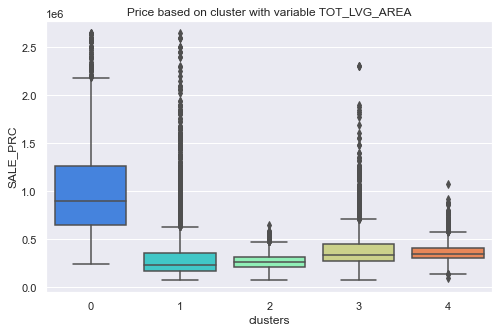

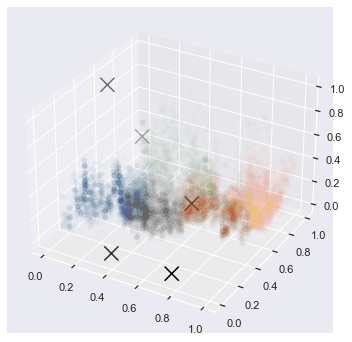

Data for kmeans++:  TOT_LVG_AREA
Time Taken for kmeans++:  0.2641422748565674


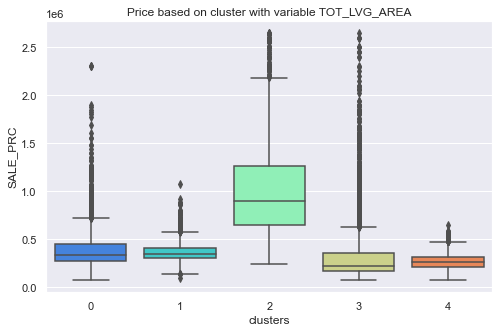

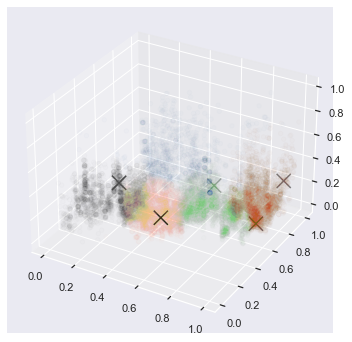

       LATITUDE  LONGITUDE  OCEAN_DIST
0      0.845660   0.903382    0.166541
1      0.846203   0.918989    0.137895
2      0.846222   0.919529    0.136911
3      0.847019   0.922091    0.131381
4      0.847130   0.917398    0.140390
...         ...        ...         ...
13927  0.645862   0.668466    0.269265
13928  0.646704   0.667142    0.272231
13929  0.647090   0.677152    0.265821
13930  0.647485   0.673799    0.268929
13931  0.648189   0.670582    0.273127

[13932 rows x 3 columns]
Data for kmeans:  OCEAN_DIST
Time Taken for kmeans:  0.02600240707397461


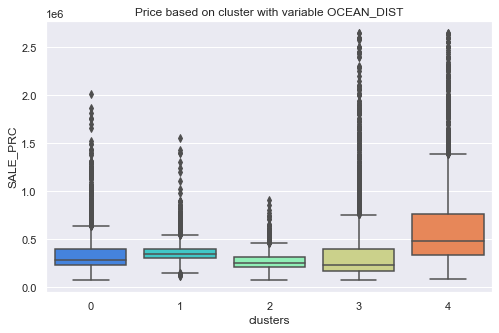

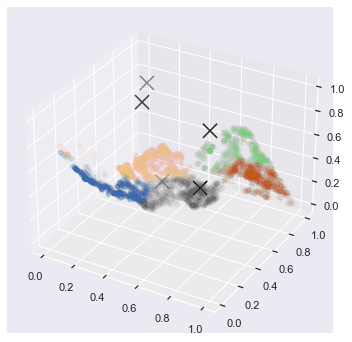

Data for kmeans++:  OCEAN_DIST
Time Taken for kmeans++:  0.22150897979736328


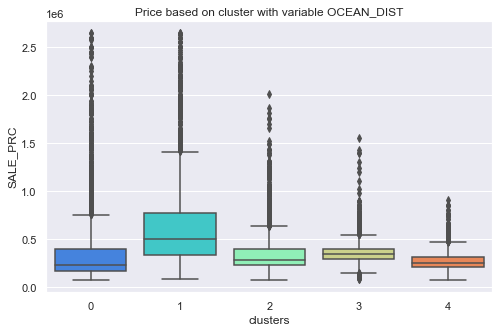

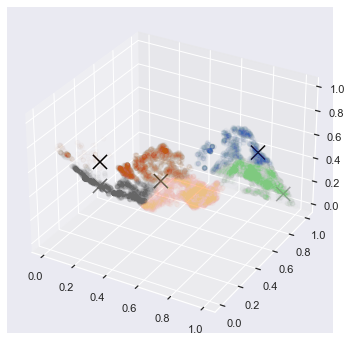

       LATITUDE  LONGITUDE  HWY_DIST
0      0.845660   0.903382  0.329985
1      0.846203   0.918989  0.375122
2      0.846222   0.919529  0.376693
3      0.847019   0.922091  0.383222
4      0.847130   0.917398  0.370513
...         ...        ...       ...
13927  0.645862   0.668466  0.017206
13928  0.646704   0.667142  0.013478
13929  0.647090   0.677152  0.013593
13930  0.647485   0.673799  0.011147
13931  0.648189   0.670582  0.007998

[13932 rows x 3 columns]
Data for kmeans:  HWY_DIST
Time Taken for kmeans:  0.02699756622314453


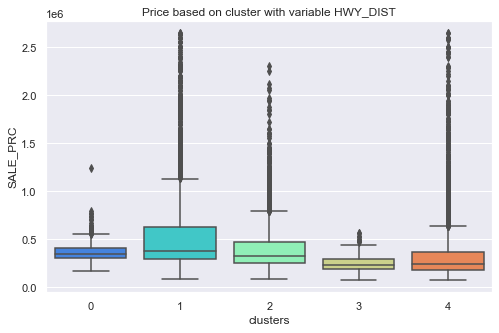

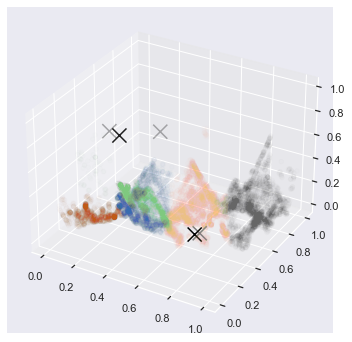

Data for kmeans++:  HWY_DIST
Time Taken for kmeans++:  0.23770403861999512


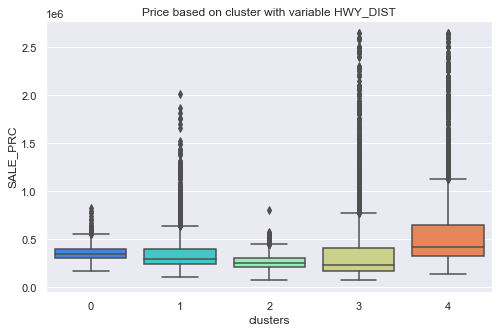

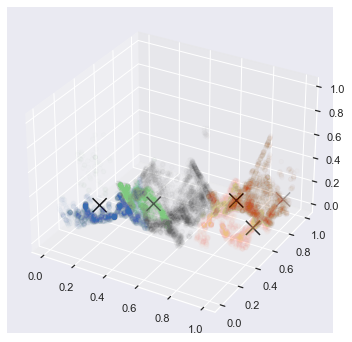

In [29]:
#list = ["LND_SQFOOT","TOT_LVG_AREA","SPEC_FEAT_VAL","RAIL_DIST","OCEAN_DIST","WATER_DIST","CNTR_DIST","SUBCNTR_DI","HWY_DIST","age","avno60plus","month_sold","structure_quality"]
list = ["TOT_LVG_AREA", "OCEAN_DIST", "HWY_DIST"]
for item in list:
    three_Feature_clustering(item)
    three_Feature_clustering_kmeanspp(item)